<a href="https://colab.research.google.com/github/sufairahmed/ML_IBM_COURSERA/blob/main/simple_linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Simple Linear Model</certer></h1>

<center><h3>Inporting the Libraries</h3>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
%matplotlib inline

<center><h3>Importing Dataset</h3>

In [81]:
dataset = pd.read_csv("FuelConsumptionCo2.csv")
dataset.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


###<center>Data Exploration</center>

In [82]:
# Summerize the Data
dataset.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


###<center>Select some Feature to Explore more</center>

In [83]:
selected_data = dataset[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
selected_data.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


##<center>Plot each of the selected Features

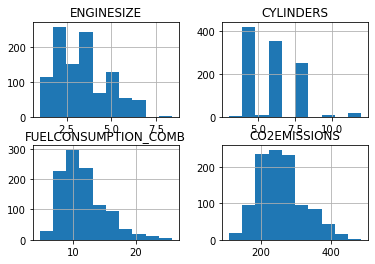

In [84]:
selected_data_viz = selected_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
selected_data_viz.hist()
plt.show()

###<center> Now plot each of the Indipendet  variable vs Dependent variable(Emission) to see how linear relation is there

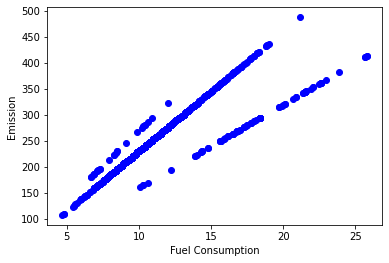

In [85]:
plt.scatter(selected_data.FUELCONSUMPTION_COMB, selected_data.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emission')
plt.show()

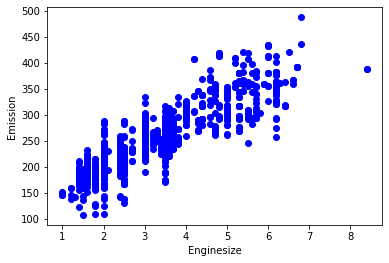

In [86]:
plt.scatter(selected_data.ENGINESIZE, selected_data.CO2EMISSIONS, color = 'blue')
plt.xlabel('Enginesize')
plt.ylabel('Emission')
plt.show()

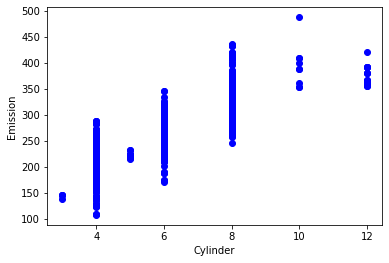

In [87]:
plt.scatter(selected_data.CYLINDERS, selected_data.CO2EMISSIONS, color = 'blue')
plt.xlabel('Cylinder')
plt.ylabel('Emission')
plt.show()

###<center> Splitting the dataset into Training set and Test set

In [88]:
msk = np.random.rand(len(dataset)) < 0.8
train = selected_data[msk]
test = selected_data[~msk]

#Simple Regression Model

#### Train data distribution

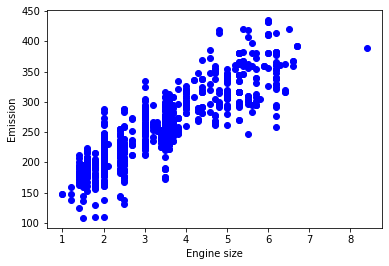

In [89]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

###Using sklearn package to model data.

In [90]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[38.22724754]]
Intercept:  [128.15092626]


## we can plot the fit line over the data:

Text(0, 0.5, 'Emission')

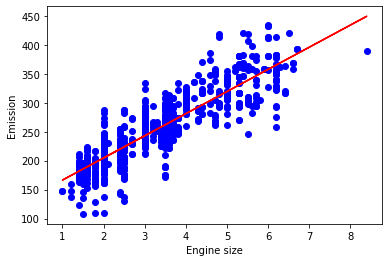

In [91]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")